# DATA MANAGEMENT PROJECT

Castelnvo Aurora, Gemelli Nicole, Marinucci Daria

# Data acquisition

In this phase, we focused on data acquisition. We considered both web scraping and APIs. However, the websites we intended to use did not allow API access, so we decided to proceed with web scraping. The first step was installing the required library, **BeautifulSoup4**.

In [77]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


# Scraping for statistics

Firstly, we have decided to get from LegaPAllavolo Itathe statistics of all the volleyball players that have played in the italian league from 2021 till 2025. All the data was divided for season, at the end we have decided to combine them all together.

**2021/2022**

In [2]:
#importation of the needed libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

#the following function applies the web scraping technique to the web pages and saves into a csv file
def extract_vbplayer_per_role(url_vb, output_to_csv, additional_column_value):
    try:
        #it sends the request to the webpage
        response = requests.get(url_vb)
                # wait fot a response
        response.raise_for_status() #Check if it was successful or not
        
        # it creates an object able to interact with hml
        soup = BeautifulSoup(response.text, 'html.parser')

        # it looks for the table which 'id' is equal to "Statistica"
        table = soup.find('table', {'id': 'Statistica'})  

       #if the table is found,returns all the content
        if table is not None:
            
            rows = table.find_all('tr')
            #creation of an empty list were data will be saved
            data = []

            # the for cicle iterate all the rows in order to get the data, skipping the header
             
            for row in rows[1:]:  
                cols = row.find_all('td')
                cols = [ele.get_text(strip=True) for ele in cols]  

                if any(cols):  # Ignores empty rows
                    cols.append(additional_column_value)  
                    data.append(cols) #store the data


            #save the data in csv format
            with open(output_to_csv, mode='w', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)

                #define the columns header for the csv file
                writer.writerow(['Athlete', 'Match_played', 'Set_played', 'Pt_Tot', 'Winning_Pt', 'BreakPt', 'Serve_Tot',
                                 'Ace', 'Serve_Err', 'Ace_per_set', 'Serve_eff', 'Rice_Tot', 'Rice_Err', 'Rice_Neg',
                                 'Rice_Prf', '%Rice_Prf', 'Rice_Eff', 'Att_Tot', 'Att_Err', 'Att_Block', 'Att_Prf',
                                 '%Att_prf', 'Att_Eff', 'Block_Inv', 'Block_Prf', 'Block_Pt_Set', 'Role'])

                
                writer.writerows(data)
    except Exception as e:
        print(f"Error: {e}")
   
 # The following lists represent respectively the URL to apply web scraping and 
#the names of the output files
urls = [
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2021&AnnoFine=2021&Ruolo=3",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2021&AnnoFine=2021&Ruolo=5",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2021&AnnoFine=2021&Ruolo=1",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2021&AnnoFine=2021&Ruolo=2",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2021&AnnoFine=2021&Ruolo=4"
]


output_files = [
    "stat_set_2122.csv", 
    "stat_opp_2122.csv",
    "stat_mb_2122.csv",
    "stat_lib_2122.csv",
    "stat_spi_2122.csv"
]

#For each output_file we need to add a column which specifies the role, this will be very useful 
#for further analyses
additional_column_values = [
    "Setter", 
    "Opposite Hitter", 
    "Middle Blocker", 
    "Libero", 
    "Spiker"
]

#We apply the function to all URLS
for url_vb, output_file, additional_value in zip(urls, output_files, additional_column_values):
    extract_vbplayer_per_role(
        url_vb=url_vb,
        output_to_csv=output_file,
        additional_column_value=additional_value
    )
    

import pandas as pd

# name that will be given to out sets of data
file_paths = [
    "stat_set_2122.csv",
    "stat_opp_2122.csv",
    "stat_mb_2122.csv",
    "stat_lib_2122.csv",
    "stat_spi_2122.csv"
]

#This function cleans all the csv files, transforming the commas in dots in decimal numbers
def clean_csv(file_path):
    df = pd.read_csv(file_path)
    df = df.replace(',', '.', regex=True)  # Substitution of commas into dots
    df.to_csv(file_path, index=False)   # save the new file

#  Here, the cleaning is applied
for file in output_files:
    clean_csv(file)

#Read all the csv files
stat_mb_2122 = pd.read_csv("stat_mb_2122.csv")
stat_lib_2122 = pd.read_csv("stat_lib_2122.csv")
stat_opp_2122 = pd.read_csv("stat_opp_2122.csv")
stat_set_2122 = pd.read_csv("stat_set_2122.csv")
stat_spi_2122 = pd.read_csv("stat_spi_2122.csv")

print(stat_opp_2122.head())#Check if everything is correct

            Athlete  Match_played  Set_played  Pt_Tot  Winning_Pt  BreakPt  \
0       Egonu Paola            33       124.0   763.0       472.0    291.0   
1    Karakurt Ebrar            32       112.0   562.0       340.0    222.0   
2   Nwakalor Sylvia            28       111.0   553.0       382.0    171.0   
3  Mingardi Camilla            28       107.0   549.0       347.0    202.0   
4     Grobelna Kaja            28       105.0   483.0       334.0    149.0   

   Serve_Tot   Ace  Serve_Err  Ace_per_set  ...  Att_Tot  Att_Err  Att_Block  \
0      471.0  49.0       86.0         0.40  ...   1298.0    144.0       30.0   
1      436.0  38.0       63.0         0.34  ...   1162.0    111.0       72.0   
2      310.0   6.0       40.0         0.05  ...   1200.0    122.0       82.0   
3      365.0  22.0       52.0         0.21  ...   1223.0     78.0       76.0   
4      397.0  27.0       55.0         0.26  ...   1023.0     58.0       88.0   

   Att_Prf  %Att_prf  Att_Eff  Block_Inv  Block_Pr

**22/23**

In [3]:
#importation of the needed libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

def extract_vbplayer_per_role(url_vb, output_to_csv, additional_column_value):
    try:
        
        response = requests.get(url_vb)
        
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')

        table = soup.find('table', {'id': 'Statistica'})  

        if table is not None:
            
            rows = table.find_all('tr')

            data = []

            for row in rows[1:]:  
                cols = row.find_all('td')
                cols = [ele.get_text(strip=True) for ele in cols]  

                if any(cols): 
                    cols.append(additional_column_value)  
                    data.append(cols)


            with open(output_to_csv, mode='w', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)

                writer.writerow(['Athlete', 'Match_played', 'Set_played', 'Pt_Tot', 'Winning_Pt', 'BreakPt', 'Serve_Tot',
                                 'Ace', 'Serve_Err', 'Ace_per_set', 'Serve_eff', 'Rice_Tot', 'Rice_Err', 'Rice_Neg',
                                 'Rice_Prf', '%Rice_Prf', 'Rice_Eff', 'Att_Tot', 'Att_Err', 'Att_Block', 'Att_Prf',
                                 '%Att_prf', 'Att_Eff', 'Block_Inv', 'Block_Prf', 'Block_Pt_Set', 'Role'])

                writer.writerows(data)
    except Exception as e:
        print(f"Error: {e}")

        
urls = [
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2022&AnnoFine=2022&Ruolo=3",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2022&AnnoFine=2022&Ruolo=5",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2022&AnnoFine=2022&Ruolo=1",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2022&AnnoFine=2022&Ruolo=2",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2022&AnnoFine=2022&Ruolo=4"
]

 
output_files = [
    "stat_set_2223.csv", 
    "stat_opp_2223.csv",
    "stat_mb_2223.csv",
    "stat_lib_2223.csv",
    "stat_spi_2223.csv"
]


additional_column_values = [
    "Setter", 
    "Opposite Hitter", 
    "Middle Blocker", 
    "Libero", 
    "Spiker"
]


for url_vb, output_file, additional_value in zip(urls, output_files, additional_column_values):
    extract_vbplayer_per_role(
        url_vb=url_vb,
        output_to_csv=output_file,
        additional_column_value=additional_value
    )
    

import pandas as pd


file_paths = [
    "stat_set_2223.csv",
    "stat_opp_2223.csv",
    "stat_mb_2223.csv",
    "stat_lib_2223.csv",
    "stat_spi_2223.csv"
]

def clean_csv(file_path):
    df = pd.read_csv(file_path)
    df = df.replace(',', '.', regex=True)  
    df.to_csv(file_path, index=False)  


for file in output_files:
    clean_csv(file)


stat_mb_2223 = pd.read_csv("stat_mb_2223.csv")
stat_lib_2223 = pd.read_csv("stat_lib_2223.csv")
stat_opp_2223 = pd.read_csv("stat_opp_2223.csv")
stat_set_2223 = pd.read_csv("stat_set_2223.csv")
stat_spi_2223 = pd.read_csv("stat_spi_2223.csv")

print(stat_opp_2223.head())

               Athlete  Match_played  Set_played  Pt_Tot  Winning_Pt  BreakPt  \
0        Haak Isabelle            35       113.0   645.0       425.0    220.0   
1       Karakurt Ebrar            30       116.0   576.0       346.0    230.0   
2      Thompson Jordan            36       112.0   513.0       358.0    155.0   
3      Nwakalor Sylvia            31       121.0   505.0       329.0    176.0   
4  Antropova Ekaterina            31       108.0   487.0       282.0    205.0   

   Serve_Tot   Ace  Serve_Err  Ace_per_set  ...  Att_Tot  Att_Err  Att_Block  \
0      425.0  23.0       97.0         0.20  ...   1179.0     70.0       48.0   
1      421.0  45.0       59.0         0.39  ...   1256.0    144.0       59.0   
2      380.0  20.0       29.0         0.18  ...   1085.0     66.0       68.0   
3      389.0  12.0       36.0         0.10  ...   1200.0    123.0       97.0   
4      373.0  53.0       86.0         0.49  ...    862.0     67.0       66.0   

   Att_Prf  %Att_prf  Att_Eff  B

**23/34**

In [4]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

def extract_vbplayer_per_role(url_vb, output_to_csv, additional_column_value):
    try:
      
        response = requests.get(url_vb)
        
       
        response.raise_for_status()
        

        soup = BeautifulSoup(response.text, 'html.parser')

        
        table = soup.find('table', {'id': 'Statistica'})  
        if table is not None:
         
            rows = table.find_all('tr')

            data = []

            for row in rows[1:]:  
                cols = row.find_all('td')
                cols = [ele.get_text(strip=True) for ele in cols]  

                if any(cols): 
                    cols.append(additional_column_value)  
                    data.append(cols)
         
            with open(output_to_csv, mode='w', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)

                writer.writerow(['Athlete', 'Match_played', 'Set_played', 'Pt_Tot', 'Winning_Pt', 'BreakPt', 'Serve_Tot',
                                 'Ace', 'Serve_Err', 'Ace_per_set', 'Serve_eff', 'Rice_Tot', 'Rice_Err', 'Rice_Neg',
                                 'Rice_Prf', '%Rice_Prf', 'Rice_Eff', 'Att_Tot', 'Att_Err', 'Att_Block', 'Att_Prf',
                                 '%Att_prf', 'Att_Eff', 'Block_Inv', 'Block_Prf', 'Block_Pt_Set', 'Role'])

                
                writer.writerows(data)
    except Exception as e:
        print(f"Error: {e}")
   

urls = [
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2023&AnnoFine=2023&Ruolo=3",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2023&AnnoFine=2023&Ruolo=5",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2023&AnnoFine=2023&Ruolo=1",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2023&AnnoFine=2023&Ruolo=2",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2023&AnnoFine=2023&Ruolo=4"
]


output_files = [
    "stat_set_2324.csv", 
    "stat_opp_2324.csv",
    "stat_mb_2324.csv",
    "stat_lib_2324.csv",
    "stat_spi_2324.csv"
]


additional_column_values = [
    "Setter", 
    "Opposite Hitter", 
    "Middle Blocker", 
    "Libero", 
    "Spiker"
]
for url_vb, output_file, additional_value in zip(urls, output_files, additional_column_values):
    extract_vbplayer_per_role(
        url_vb=url_vb,
        output_to_csv=output_file,
        additional_column_value=additional_value
    )
    

import pandas as pd

file_paths = [
    "stat_set_2324.csv",
    "stat_opp_2324.csv",
    "stat_mb_2324.csv",
    "stat_lib_2324.csv",
    "stat_spi_2324.csv"
]


def clean_csv(file_path):
    df = pd.read_csv(file_path)
    df = df.replace(',', '.', regex=True)  
    df.to_csv(file_path, index=False) 
for file in output_files:
    clean_csv(file)


stat_mb_2324 = pd.read_csv("stat_mb_2324.csv")
stat_lib_2324 = pd.read_csv("stat_lib_2324.csv")
stat_opp_2324 = pd.read_csv("stat_opp_2324.csv")
stat_set_2324 = pd.read_csv("stat_set_2324.csv")
stat_spi_2324= pd.read_csv("stat_spi_2324.csv")

print(stat_spi_2324.tail())

               Athlete  Match_played  Set_played  Pt_Tot  Winning_Pt  BreakPt  \
60         Ceasar Tara            12         4.0     NaN         NaN      NaN   
61     Nowakowska Pola             9         1.0     NaN         NaN      NaN   
62  Tonelli Viktoria 0             2         NaN     NaN         NaN      NaN   
63      Orthmann Hanna             1         NaN     NaN         NaN      NaN   
64    Perico Giorgia 0             1         NaN     NaN         NaN      NaN   

    Serve_Tot  Ace  Serve_Err  Ace_per_set  ...  Att_Tot  Att_Err  Att_Block  \
60        5.0  NaN        NaN          NaN  ...      4.0      1.0        NaN   
61        2.0  NaN        NaN          NaN  ...      NaN      NaN        NaN   
62        NaN  NaN        NaN          NaN  ...      NaN      NaN        NaN   
63        NaN  NaN        NaN          NaN  ...      NaN      NaN        NaN   
64        NaN  NaN        NaN          NaN  ...      NaN      NaN        NaN   

    Att_Prf  %Att_prf  Att_Eff  

**24/25**

In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

def extract_vbplayer_per_role(url_vb, output_to_csv, additional_column_value):
    try:
       
        response = requests.get(url_vb)
        
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')

        table = soup.find('table', {'id': 'Statistica'})  

      
        if table is not None:
            
            rows = table.find_all('tr')

            
            data = []

            for row in rows[1:]:  
                cols = row.find_all('td')
                cols = [ele.get_text(strip=True) for ele in cols]  

                if any(cols): 
                    cols.append(additional_column_value)  
                    data.append(cols)


         
            with open(output_to_csv, mode='w', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)

                 
                writer.writerow(['Athlete', 'Match_played', 'Set_played', 'Pt_Tot', 'Winning_Pt', 'BreakPt', 'Serve_Tot',
                                 'Ace', 'Serve_Err', 'Ace_per_set', 'Serve_eff', 'Rice_Tot', 'Rice_Err', 'Rice_Neg',
                                 'Rice_Prf', '%Rice_Prf', 'Rice_Eff', 'Att_Tot', 'Att_Err', 'Att_Block', 'Att_Prf',
                                 '%Att_prf', 'Att_Eff', 'Block_Inv', 'Block_Prf', 'Block_Pt_Set', 'Role'])

                
                writer.writerows(data)
    except Exception as e:
        print(f"Error: {e}")

urls = [
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2024&AnnoFine=2025&Ruolo=3",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2024&AnnoFine=2025&Ruolo=5",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2024&AnnoFine=2025&Ruolo=1",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2024&AnnoFine=2025&Ruolo=2",
    "https://ww2.legavolleyfemminile.it/Statistiche_i.asp?TipoStat=2.4&Serie=1&AnnoInizio=2024&AnnoFine=2025&Ruolo=4"
]


output_files = [
    "stat_set_2425.csv", 
    "stat_opp_2425.csv",
    "stat_mb_2425.csv",
    "stat_lib_2425.csv",
    "stat_spi_2425.csv"
]
additional_column_values = [
    "Setter", 
    "Opposite Hitter", 
    "Middle Blocker", 
    "Libero", 
    "Spiker"
]


for url_vb, output_file, additional_value in zip(urls, output_files, additional_column_values):
    extract_vbplayer_per_role(
        url_vb=url_vb,
        output_to_csv=output_file,
        additional_column_value=additional_value
    )
    

import pandas as pd


file_paths = [
    "stat_set_2425.csv",
    "stat_opp_2425.csv",
    "stat_mb_2425.csv",
    "stat_lib_2425.csv",
    "stat_spi_2425.csv"
]

def clean_csv(file_path):
    df = pd.read_csv(file_path)
    df = df.replace(',', '.', regex=True)  
    df.to_csv(file_path, index=False)  


for file in output_files:
    clean_csv(file)


stat_mb_2425 = pd.read_csv("stat_mb_2425.csv")
stat_lib_2425 = pd.read_csv("stat_lib_2425.csv")
stat_opp_2425 = pd.read_csv("stat_opp_2425.csv")
stat_set_2425 = pd.read_csv("stat_set_2425.csv")
stat_spi_2425 = pd.read_csv("stat_spi_2425.csv")

print(stat_mb_2425.head())

            Athlete  Match_played  Set_played  Pt_Tot  Winning_Pt  BreakPt  \
0   Weitzel Camilla            23        97.0   262.0       174.0     88.0   
1       Candi Sonia            23        97.0   251.0       151.0    100.0   
2  Manfredini Linda            23        79.0   204.0       101.0    103.0   
3       Danesi Anna            23        79.0   200.0       125.0     75.0   
4      Aleksic Maja            22        77.0   183.0       108.0     75.0   

   Serve_Tot   Ace  Serve_Err  Ace_per_set  ...  Att_Tot  Att_Err  Att_Block  \
0      378.0  27.0       38.0         0.28  ...    318.0     11.0       15.0   
1      297.0  14.0       56.0         0.14  ...    329.0     18.0       21.0   
2      301.0  33.0       56.0         0.42  ...    298.0     26.0       19.0   
3      310.0  12.0       25.0         0.15  ...    233.0      9.0       14.0   
4      287.0  13.0       19.0         0.17  ...    210.0     13.0       11.0   

   Att_Prf  %Att_prf  Att_Eff  Block_Inv  Block_Pr

**Some insights**

All the statistics dataframes have the same structure, for this reasone we have decided to take the last one as example to perform a preliminary exploration of the data conteined in it.
We have decided to concatenate all the roles together to have a complete overview.

In [6]:
import pandas as pd
athl24 = pd.concat([stat_mb_2425,stat_lib_2425,stat_opp_2425,stat_set_2425,stat_spi_2425])
athl24.dtypes

Athlete          object
Match_played      int64
Set_played      float64
Pt_Tot          float64
Winning_Pt      float64
BreakPt         float64
Serve_Tot       float64
Ace             float64
Serve_Err       float64
Ace_per_set     float64
Serve_eff       float64
Rice_Tot        float64
Rice_Err        float64
Rice_Neg        float64
Rice_Prf        float64
%Rice_Prf       float64
Rice_Eff        float64
Att_Tot         float64
Att_Err         float64
Att_Block       float64
Att_Prf         float64
%Att_prf        float64
Att_Eff         float64
Block_Inv       float64
Block_Prf       float64
Block_Pt_Set    float64
Role             object
dtype: object

In [7]:
missing_percent = athl24.isnull().mean() * 100  #Compute the percentage
missing_percent.nlargest(5)  #look for the 5 highest



Block_Inv    89.316239
Rice_Prf     50.427350
%Rice_Prf    50.427350
Rice_Err     42.735043
Rice_Eff     42.307692
dtype: float64

In [8]:
print(athl24.describe())
athl24.describe()[["Match_played","Set_played","Pt_Tot","BreakPt","Serve_Tot","Att_Tot","Ace"]]

       Match_played  Set_played      Pt_Tot  Winning_Pt     BreakPt  \
count    234.000000  199.000000  166.000000  155.000000  164.000000   
mean      18.636752   52.572864  121.313253   78.987097   48.140244   
std        7.602835   28.412074  113.824419   73.227717   41.740197   
min        1.000000    1.000000    1.000000    1.000000    1.000000   
25%       18.000000   30.000000   20.500000   20.000000   10.750000   
50%       23.000000   55.000000   92.000000   62.000000   39.500000   
75%       23.000000   79.000000  178.500000  112.500000   73.000000   
max       24.000000   97.000000  506.000000  351.000000  200.000000   

        Serve_Tot         Ace   Serve_Err  Ace_per_set   Serve_eff  ...  \
count  174.000000  153.000000  165.000000   153.000000  157.000000  ...   
mean   153.775862    9.398693   18.951515     0.151111   -0.098535  ...   
std    112.927115    8.210503   15.810928     0.098599    0.125529  ...   
min      1.000000    1.000000    1.000000     0.020000   -1.

,Match_played,Set_played,Pt_Tot,BreakPt,Serve_Tot,Att_Tot,Ace
count,234.000000,199.000000,166.000000,164.000000,174.000000,163.000000,153.000000
mean,18.636752,52.572864,121.313253,48.140244,153.775862,243.171779,9.398693
std,7.602835,28.412074,113.824419,41.740197,112.927115,252.873794,8.210503
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,30.000000,20.500000,10.750000,42.000000,42.500000,3.000000
50%,23.000000,55.000000,92.000000,39.500000,155.500000,164.000000,7.000000
75%,23.000000,79.000000,178.500000,73.000000,264.750000,359.500000,13.000000
max,24.000000,97.000000,506.000000,200.000000,378.000000,1082.000000,52.000000


# Scraping nationality

In this phase, we applied web scraping to obtain a list of Italian volleyball players. This list is essential for forming the new team. We considered all previous seasons, not just the most recent one, since some players may have played abroad or retired.

In [9]:
#Importation of the needed library
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL list of the italian volleyball player from 2021 to 2025
URLS = [
    "https://www.legavolleyfemminile.it/atlete/?stagione=2024&nazione=ITA",
    "https://www.legavolleyfemminile.it/atlete/?stagione=2023&nazione=ITA",
    "https://www.legavolleyfemminile.it/atlete/?stagione=2022&nazione=ITA",
    "https://www.legavolleyfemminile.it/atlete/?stagione=2021&nazione=ITA"
]

#This function upload HTML file and convert it in an object that can use the Beautiful soap function.
def get_soup(url):
    response = requests.get(url)
    response.raise_for_status() #raise an error for failing request
    return BeautifulSoup(response.text, 'html.parser')

#This function extracts the needed data from the table
def extract_athlete_data(row):
    cols = row.find_all("td")
    return {
        "Name": cols[0].get_text(strip=True) if len(cols) > 0 else "",
        "Surname": cols[1].get_text(strip=True) if len(cols) > 1 else "",
        "Role": cols[2].get_text(strip=True) if len(cols) > 2 else "",
        "Nationality": cols[3].get_text(strip=True) if len(cols) > 3 else "",
        "Height": cols[4].get_text(strip=True) if len(cols) > 4 else "",
        "Birth Year": cols[5].get_text(strip=True) if len(cols) > 5 else ""
    }

#The following function executes the web scraping
def scrape_urls(urls):
    athletes = []
    
    for url in urls:
        print(f"Scraping: {url}")
        soup = get_soup(url)
        rows = soup.select("tr")  # Select all rows in the table
        
        new_data = [extract_athlete_data(row) for row in rows if row.find_all("td")]
        athletes.extend(new_data)

    return pd.DataFrame(athletes) # Return extracted data as a Pandas DataFrame

def main():
    # Try to load existing data; if not found, create an empty DataFrame
    try:
        existing_df = pd.read_csv("athletes.csv")
    except FileNotFoundError: 
        existing_df = pd.DataFrame(columns=["Athlete", "Role", "Nationality", "Height", "Birth Year"])

    # new data scraping
    new_df = scrape_urls(URLS)

    # Role traslation to english
    role_translation = {
        "Schiacciatrice": "Spiker",
        "Palleggiatrice": "Setter",
        "Centrale": "Middle Blocker",
        "Opposto": "Opposite Hitter"
    }
    new_df["Role"] = new_df["Role"].replace(role_translation) #replacement of the italian role

    #To improve quality and be coherent with other datasets, we need to union the columns
    #Name and Surname in a single one
    new_df["Athlete"] = new_df["Surname"].fillna("") + " " + new_df["Name"].fillna("")

    # Selection of the columns that we want in the dataset
    new_df = new_df[["Athlete", "Role", "Nationality", "Height", "Birth Year"]]

    #Here, the final dataset is created
    #Firstly, we remove the rows where we find NA in the column Athlete
    new_df = new_df.dropna(subset=["Athlete"]) 
    #we concatenate the previous dataset with the one resulting from the new scraping iteration
    #for example from the concatenation of season 2021-2022 and 2022-2023. We also drop
    #duplicates in order to have unique data
    updated_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=["Athlete"])
    #We sort the value by athletes
    updated_df=updated_df.sort_values(by="Athlete")
    #Change the name of height
    updated_df['Height']=updated_df['Height'].str.replace(' cm', '')

    #Final dataset saving
    updated_df.to_csv("athletes.csv", index=False)
   
    # Print the first rows
    print(pd.read_csv("athletes.csv").head())
# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()


Scraping: https://www.legavolleyfemminile.it/atlete/?stagione=2024&nazione=ITA
Scraping: https://www.legavolleyfemminile.it/atlete/?stagione=2023&nazione=ITA
Scraping: https://www.legavolleyfemminile.it/atlete/?stagione=2022&nazione=ITA
Scraping: https://www.legavolleyfemminile.it/atlete/?stagione=2021&nazione=ITA
                    Athlete             Role Nationality Height  Birth Year
0          Acciarri Nausica   Middle Blocker         ITA    186        2004
1              Adelusi Anna  Opposite Hitter         ITA    186        2003
2  Adigwe Merit Chinenyenwa  Opposite Hitter         ITA    183        2006
3          Adriano Virginia  Opposite Hitter         ITA    196        2004
4              Agazzi Giada   Middle Blocker         ITA    190        2003


In [10]:
import pandas as pd
#save the fill
players=pd.read_csv("athletes.csv")

# trasform the na in 0
players.fillna(0, inplace=True)

#print dataset
players

,Athlete,Role,Nationality,Height,Birth Year
0,Acciarri Nausica,Middle Blocker,ITA,186,2004
1,Adelusi Anna,Opposite Hitter,ITA,186,2003
2,Adigwe Merit Chinenyenwa,Opposite Hitter,ITA,183,2006
3,Adriano Virginia,Opposite Hitter,ITA,196,2004
4,Agazzi Giada,Middle Blocker,ITA,190,2003
...,...,...,...,...,...
663,Zonta Irene,Opposite Hitter,ITA,189,1996
664,Zorzetto Aurora,Spiker,ITA,183,2003
665,Zorzetto Gaia,Setter,ITA,175,2005
666,Zuccarelli Agata,Opposite Hitter,ITA,180,1995


**Preliminary analyses**

We want to discover some insights of the dataset, therefore we will perform some analyses. Firstly, we want to know the attribute type, then we check the presence of missing values.

In [11]:
players.dtypes

Athlete        object
Role           object
Nationality    object
Height         object
Birth Year      int64
dtype: object

In [12]:
players.isnull().sum()

Athlete        0
Role           0
Nationality    0
Height         0
Birth Year     0
dtype: int64

In [13]:
#oldest player
min_byear = players["Birth Year"].min() #look for the minimum year
#filter
players[players["Birth Year"] == min_byear][["Athlete", "Role", "Birth Year","Height"]]


,Athlete,Role,Birth Year,Height
7,Aguero Taismary,Spiker,1977,178


In [14]:
#youngest player
max_byear = players["Birth Year"].max() #look for the maximum year
#filter
players[players["Birth Year"] == max_byear][["Athlete", "Role", "Birth Year","Height"]]

,Athlete,Role,Birth Year,Height
25,Arcangeli Chiara,Middle Blocker,2008,188
417,Monti Martina,Spiker,2008,176
418,Monti Noemi,Spiker,2008,175
658,Zeni Beatrice,Libero,2008,163


C:\Users\Daria\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


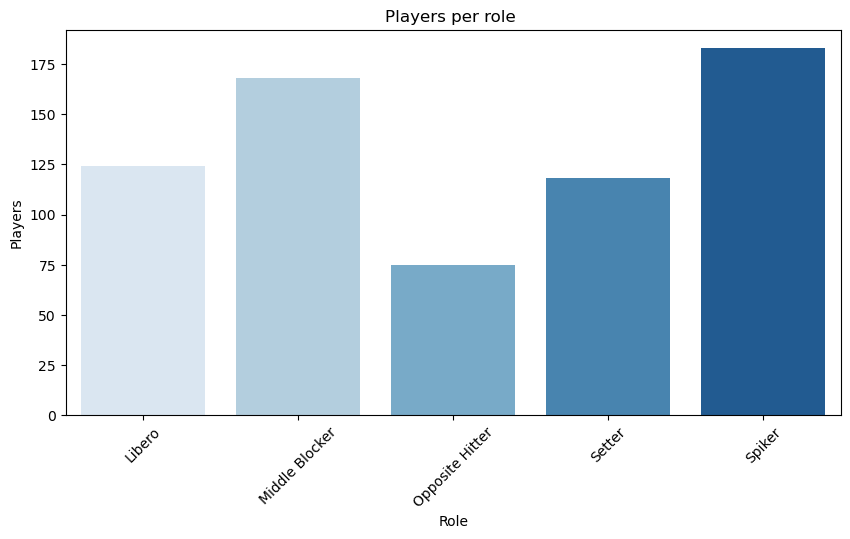

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# groupby role
role_counts = players["Role"].value_counts()

# Sort the indexes (roles) alphabetically
role_counts = role_counts.sort_index()

# barplot barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=role_counts.index, y=role_counts.values, palette="Blues")

# labels
plt.xlabel("Role")
plt.ylabel("Players")
plt.title("Players per role ")
plt.xticks(rotation=45)

plt.show()

# Merge per ML


As we have introduced before, in this paragraph all the statistics datasets will be concatenate together. We have the necessity to do it, in order to perform machine learing techniques to predict the team of next tournament. 
We need to add the season to each dataset before combining them together.

In [16]:
#Pandas importation
import pandas as pd

# Concatenate all DataFrames into one, adding the season
athl21 = pd.concat([stat_mb_2122, stat_lib_2122, stat_opp_2122, stat_set_2122, stat_spi_2122])
athl21["Year"]= "21_22"
athl22 = pd.concat([stat_mb_2223,stat_lib_2223,stat_opp_2223,stat_set_2223,stat_spi_2223])
athl22["Year"]= "22_23"
athl23 = pd.concat([stat_mb_2324,stat_lib_2324,stat_opp_2324,stat_set_2324,stat_spi_2324])
athl23["Year"]= "23_24"
athl24 = pd.concat([stat_mb_2425,stat_lib_2425,stat_opp_2425,stat_set_2425,stat_spi_2425])
athl24["Year"]= "24_25"
athl_tot=pd.concat([athl21,athl22,athl23,athl24]) #concatenation

#sort the dataset by role and athlete
total_ds=players.merge(athl_tot).sort_values(by=['Role','Athlete'])
total_ds.to_csv("total_ds.csv", index=False) #save to csv
total_ds

,Athlete,Role,Nationality,Height,Birth Year,Match_played,Set_played,Pt_Tot,Winning_Pt,BreakPt,...,Att_Tot,Att_Err,Att_Block,Att_Prf,%Att_prf,Att_Eff,Block_Inv,Block_Prf,Block_Pt_Set,Year
26,Armini Martina,Libero,ITA,175,2002,28,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21_22
27,Armini Martina,Libero,ITA,175,2002,26,96.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22_23
28,Armini Martina,Libero,ITA,175,2002,31,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23_24
29,Armini Martina,Libero,ITA,175,2002,23,79.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24_25
34,Barbero Emma,Libero,ITA,170,2004,29,53.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22_23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Traballi Gaia,Spiker,ITA,183,1997,23,55.0,164.0,100.0,64.0,...,362.0,23.0,34.0,147.0,40.6,-0.34,1.0,16.0,0.29,24_25
478,Villani Francesca,Spiker,ITA,187,1995,27,93.0,285.0,166.0,119.0,...,597.0,43.0,37.0,239.0,40.0,-0.33,NaN,29.0,0.31,21_22
479,Villani Francesca,Spiker,ITA,187,1995,29,85.0,304.0,187.0,117.0,...,630.0,39.0,36.0,268.0,42.5,-0.36,1.0,29.0,0.34,22_23
480,Villani Francesca,Spiker,ITA,187,1995,25,25.0,47.0,23.0,24.0,...,106.0,9.0,6.0,38.0,35.8,-0.27,NaN,7.0,0.28,23_24


# Tournament teams from 2021 until 2024

In this paragraph we extract the team of each tournament from 2021 till 2024. We want a clear dataset, so we have decided to combine the datasets. The final dataset will have the player column, the role, the birth year, fir each tournament a binary column, where 1 indicates the participation. 

In [17]:
#importation of the needed libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract table data and save it to a CSV
def extract_table_to_csv(url_vb, cl_table, output_to_csv):
    try:
        # Send a GET request to the URL
        response = requests.get(url_vb)
        response.raise_for_status()  # Raise an exception for HTTP errors
        
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Locate the section containing "Italia"
        section = soup.find(lambda tag: tag.name == "h2" and "Italia" in tag.get_text())
        if not section:
            print(f"No 'Italia' in {url_vb}")
            return
        
        # Find the next table with the specified class
        table = section.find_next("table", class_=cl_table)
        if not table:
            print(f"No table found in {url_vb}")
            return
        
        # Extract rows from the table
        rows = table.find_all("tr")
        data = []
        for row in rows:
            cols = row.find_all(['th', 'td'])  # Include both headers and data cells
            cols = [col.get_text(strip=True) for col in cols]
            if cols:  # Skip empty rows
                data.append(cols)

        # Ensure data is not empty
        if not data:
            print(f"No data found in the table at {url_vb}")
            return
        
        # Separate header and rows
        header, *rows = data
        header = [col.split('[')[0].strip() for col in header] 

        # Create the DataFrame
        df = pd.DataFrame(rows, columns=header)
        
        # Filter rows if "Ruolo" exists
        if "Ruolo" in df.columns:
            df = df[df["Ruolo"] != "All"] #we don't need to know the trainer
        
        
        # Save DataFrame to CSV
        df.to_csv(output_to_csv, index=False, encoding='utf-8')
        
    except Exception as e:
        print(f"Errore: {e}")
   
 # List of URLs to scrape
urls = [
    "https://it.wikipedia.org/wiki/Pallavolo_ai_Giochi_della_XXXIII_Olimpiade_-_Convocazioni_al_torneo_femminile#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_alla_Volleyball_Nations_League_femminile_2024#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_alla_Volleyball_Nations_League_femminile_2023#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_al_campionato_europeo_femminile_di_pallavolo_2023#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_al_campionato_mondiale_femminile_di_pallavolo_2022#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_alla_Volleyball_Nations_League_femminile_2022#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_alla_Volleyball_Nations_League_femminile_2021#Italia",
    "https://it.wikipedia.org/wiki/Convocazioni_al_campionato_europeo_femminile_di_pallavolo_2021#Italia"
]

# List of filenames for CSV output
output_files = [
    "team_olympics.csv", 
    "team_VNL2024.csv", 
    "team_VNL2023.csv",
    "team_EU2023.csv",
    "team_world2022.csv",
    "team_VNL2022.csv",
    "team_VNL2021.csv",
    "team_EU2021.csv"
]



# Ensure the lists of URLs and output files match in length
if len(urls) != len(output_files):
    raise ValueError("!!Error")

# Process each URL and save the data to the corresponding CSV file
for url, output_file in zip(urls, output_files):
    extract_table_to_csv(
        url_vb=url,
        cl_table='wikitable',
        output_to_csv=output_file,
            )


In the following piece of code some transformations will be performed. First we need to change the players' name in order to be coherent with the others. Then we have to translate the role from italian to english, else they won't match with other datasets. Lastly, as the date of birth is saved in parse format and we just want to know the year, we have decided to extract it. 

In [18]:
import pandas as pd
import re
import os

# Function to invert the player's name, to be coherent with other datasets
def invert_name(name):
    name = re.sub(r"\[\d+\]", "", name).strip()  # Remove references like [1], [2]
    parts = name.split()
    if len(parts) > 2:
        return f"{' '.join(parts[1:])} {parts[0]}"
    elif len(parts) == 2:
        return f"{parts[1]} {parts[0]}"
    else:
        return name

# Function to translate roles
def translate_role(role):
    translations = {
        "S": "Spiker",
        "C": "Middle Blocker",
        "P": "Setter",
        "L": "Libero",
        "O": "Opposite"
    }
    return translations.get(role, role)

# Function to extract the year from the date
def extract_year(date):
    return date.split()[-1]

# Function to transform a dataset
def transform_dataset(file_path, output_path=None):
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File not in: {file_path}")
            return None

        # Read the dataset
        df = pd.read_csv(file_path)

        # Check if required columns exist
        required_columns = {"Nome", "Ruolo", "Data di nascita", "Squadra"}
        missing_columns = required_columns - set(df.columns)
        if missing_columns:
            print(f"Missing columns in {file_path}: {missing_columns}")
            return None

        # Apply transformations
        df["Player"] = df["Nome"].apply(invert_name)
        df["Role"] = df["Ruolo"].apply(translate_role)
        df["Year"] = df["Data di nascita"].apply(extract_year)

        # Select only the necessary columns
        transformed_df = df[["Player", "Role", "Year", "Squadra"]]

        # Save the result if an output path is specified
        if output_path:
            transformed_df.to_csv(output_path, index=False)

        return transformed_df

    except Exception as e:
      return None

# List of input and output datasets
datasets = [
    ("team_olympics.csv", "team_olympics.csv"),
    ("team_VNL2024.csv", "team_VNL2024.csv"),
    ("team_VNL2023.csv", "team_VNL2023.csv"),
    ("team_EU2023.csv", "team_EU2023.csv"),
    ("team_world2022.csv", "team_world2022.csv"),
    ("team_VNL2022.csv", "team_VNL2022.csv"),
    ("team_VNL2021.csv", "team_VNL2021.csv"),
    ("team_EU2021.csv", "team_EU2021.csv")
]

# Process all datasets
for input_file, output_file in datasets:
    transformed = transform_dataset(input_file, output_file)
    if transformed is not None:
        print(f"Successfully  saved as {output_file}")


Successfully  saved as team_olympics.csv
Successfully  saved as team_VNL2024.csv
Successfully  saved as team_VNL2023.csv
Successfully  saved as team_EU2023.csv
Successfully  saved as team_world2022.csv
Successfully  saved as team_VNL2022.csv
Successfully  saved as team_VNL2021.csv
Successfully  saved as team_EU2021.csv


Here, we combine all tournaments datasets in order to have a final one. The binary columns can accept just 0/1 values. ! indicate the participation to the torunament and 0 the non participation

In [19]:
#combined dataset
import pandas as pd
olimp=pd.read_csv("team_olympics.csv")
EU23=pd.read_csv("team_EU2023.csv")
WO22=pd.read_csv("team_world2022.csv")
EU21=pd.read_csv("team_EU2021.csv")
VNL24=pd.read_csv("team_VNL2024.csv")
VNL23=pd.read_csv("team_VNL2023.csv")
VNL22=pd.read_csv("team_VNL2022.csv")
VNL21=pd.read_csv("team_VNL2021.csv")
# List with the dataset and their names
datasets = {"olimp": olimp, "EU23": EU23, "WO22": WO22, "EU21": EU21, "VNL24":VNL24, "VNL23":VNL23,
           "VNL22":VNL22, "VNL21":VNL21}

# Dictionary that will save the players
vb = {}

# Iteration on the dataset
for name, df in datasets.items():
    for player in df["Player"]:  # Look for the colum player
        if player not in vb:
            vb[player] = {dataset: 0 for dataset in datasets}  # Start with 0
        vb[player][name] = 1  # if the player has been in at least one teams

# creation of the dataframe
vb_df = pd.DataFrame.from_dict(vb, orient="index").reset_index()

# Rename the index column
vb_df = vb_df.rename(columns={"index": "Player"})


print(vb_df)

                   Player  olimp  EU23  WO22  EU21  VNL24  VNL23  VNL22  VNL21
0           Lubian Marina      1     1     1     0      1      0      1      1
1          Cambi Carlotta      1     0     0     0      1      0      0      0
2          Spirito Ilaria      1     0     0     0      1      0      0      0
3       De Gennaro Monica      1     0     1     1      1      0      1      0
4            Orro Alessia      1     1     1     1      1      0      1      0
5        Bosetti Caterina      1     0     1     0      1      0      1      0
6             Danesi Anna      1     1     1     1      1      1      1      0
7            Sylla Myriam      1     1     1     1      1      1      1      0
8             Egonu Paola      1     1     1     1      1      0      1      0
9              Fahr Sarah      1     0     0     1      1      0      0      0
10         Omoruyi Loveth      1     1     0     0      1      1      0      1
11    Antropova Ekaterina      1     1     0     0  

Next code combines the athlete dataset with the torunament one, in order to have a final one.

In [20]:
# concatenation
turn = pd.concat(datasets.values()) 
team_tourn= turn.merge(vb_df)[["Player","Role","Year","olimp","EU23","WO22",
                               "EU21","VNL24","VNL23","VNL22",
                               "VNL21"]].drop_duplicates().sort_values(by=["Role","Player"])
team_tourn.to_csv("team_turn.csv", index=False)
team_tourn

,Player,Role,Year,olimp,EU23,WO22,EU21,VNL24,VNL23,VNL22,VNL21
127,De Bortoli Chiara,Libero,1997,0,0,0,0,0,0,0,1
10,De Gennaro Monica,Libero,1987,1,0,1,1,1,0,1,0
67,Fersino Eleonora,Libero,2000,0,1,1,0,1,1,1,1
119,Panetoni Sara,Libero,2000,0,0,0,0,0,1,0,0
85,Parrocchiale Beatrice,Libero,1995,0,1,0,1,0,1,0,0
8,Spirito Ilaria,Libero,1994,1,0,0,0,1,0,0,0
115,Akrari Yasmina,Middle Blocker,1993,0,0,0,0,1,0,0,0
91,Bonifacio Sara,Middle Blocker,1996,0,0,1,1,1,0,1,1
99,Chirichella Cristina,Middle Blocker,1994,0,0,1,1,0,0,1,0
25,Danesi Anna,Middle Blocker,1996,1,1,1,1,1,1,1,0


**Data profiling**

Here, we perform some preliminary analyses in order to have a better understinding of the dataset.

In [21]:
team_tourn.dtypes

Player    object
Role      object
Year       int64
olimp      int64
EU23       int64
WO22       int64
EU21       int64
VNL24      int64
VNL23      int64
VNL22      int64
VNL21      int64
dtype: object

In [22]:
team_tourn.isnull().sum()

Player    0
Role      0
Year      0
olimp     0
EU23      0
WO22      0
EU21      0
VNL24     0
VNL23     0
VNL22     0
VNL21     0
dtype: int64

In [23]:
team_tourn.describe()

,Year,olimp,EU23,WO22,EU21,VNL24,VNL23,VNL22,VNL21
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1997.395349,0.302326,0.325581,0.325581,0.348837,0.488372,0.395349,0.488372,0.372093
std,3.274283,0.464701,0.474137,0.474137,0.482243,0.505781,0.494712,0.505781,0.489083
min,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2003.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MONGO DB

Here starts the data storage phase. The first step consists in installing pymongo, a library that allows the interaction between Python and mongoDB

In [24]:
pip install pymongo


Note: you may need to restart the kernel to use updated packages.


In [63]:
#librares importation
from pymongo import MongoClient
import pandas as pd

#list of the included files
csv_files = [
    "stat_set_2425.csv",
    "stat_opp_2425.csv",
    "stat_mb_2425.csv",
    "stat_lib_2425.csv",
    "stat_spi_2425.csv",
    "stat_set_2324.csv",
    "stat_opp_2324.csv",
    "stat_mb_2324.csv",
    "stat_lib_2324.csv",
    "stat_spi_2324.csv",
    "stat_set_2223.csv",
    "stat_opp_2223.csv",
    "stat_mb_2223.csv",
    "stat_lib_2223.csv",
    "stat_spi_2223.csv",    
    "stat_set_2122.csv", 
    "stat_opp_2122.csv",
    "stat_mb_2122.csv",
    "stat_lib_2122.csv",
    "stat_spi_2122.csv",
    "athletes.csv",
    "total_ds.csv",
    "team_turn.csv"
]

# Set the connection
mongo_uri = "mongodb://localhost:27017/"  # This is our local host
net = MongoClient(mongo_uri)
db = net['Volleyball']  # Use the db 'Volleyball'

#The for loops iterate among all the csv files in the list
for csv_file in csv_files:
    try:
    
        file = pd.read_csv(csv_file)

        # transformation to dictionary 
        docs = file.to_dict(orient='records')

        # change the collection name, deleting ".csv"
        collection_name = csv_file.split('.')[0]  
        collection = db[collection_name]

        # Insert the document
        if docs:  
            result = collection.insert_many(docs)
           
    except Exception as e:
        print(f"Error {csv_file}: {e}")
net.close()

# ANALISI ESPLORATIVA

In this section, we have done some general exploratory analysis trying to answer some questions that help discover relationships and patterns between the variables in our datasets

In [14]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


1: How is the distribution of roles by year of birth?

C:\Users\Daria\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


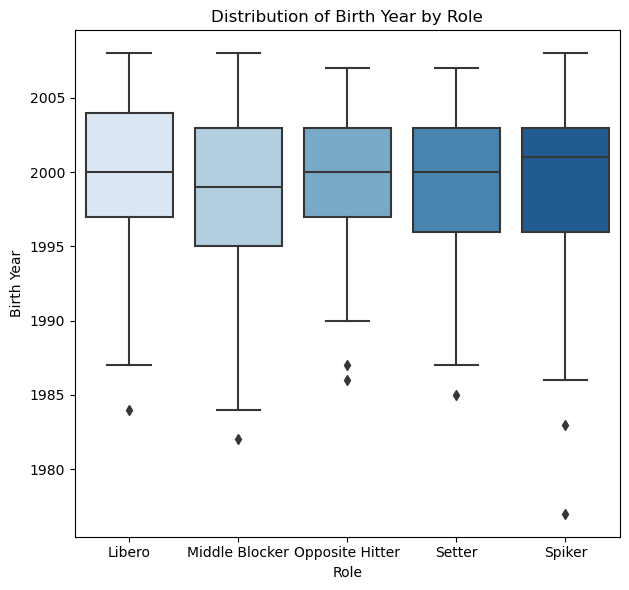

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots
plt.figure(figsize=(12, 6))

# Boxplot for birth year by role
plt.subplot(1, 2, 2)

# Order roles alphabetically
players['Role'] = pd.Categorical(players['Role'], categories=sorted(players['Role'].unique()), ordered=True)

sns.boxplot(x='Role', y='Birth Year', data=players, palette="Blues")
plt.title('Distribution of Birth Year by Role')

plt.tight_layout()
plt.show()

2: How is the distribution of roles by height?

C:\Users\Daria\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


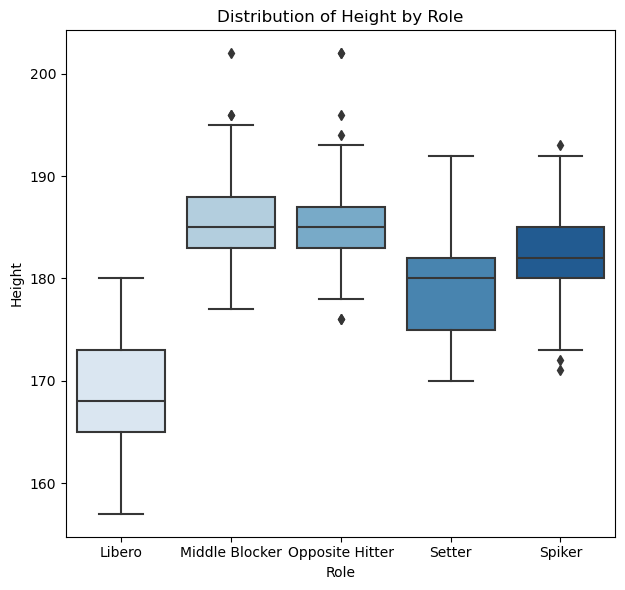

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

players.loc[players['Athlete'] == 'Citterio Maddalena', 'Height'] = 184
players.loc[players['Athlete'] == 'Nordi Martina', 'Height'] = 0
players['Height']=pd.to_numeric(players['Height'])
players['Height'] = players['Height'].replace(0, np.nan)

# Create boxplots
plt.figure(figsize=(12, 6))

# Boxplot for birth year by role
plt.subplot(1, 2, 2)

# Order roles alphabetically
players['Role'] = pd.Categorical(players['Role'], categories=sorted(players['Role'].unique()), ordered=True)


sns.boxplot(x='Role', y='Height', data=players,  palette="Blues")
plt.title('Distribution of Height by Role')

plt.tight_layout()
plt.show()

3: How is the distribution of roles in total_ds?

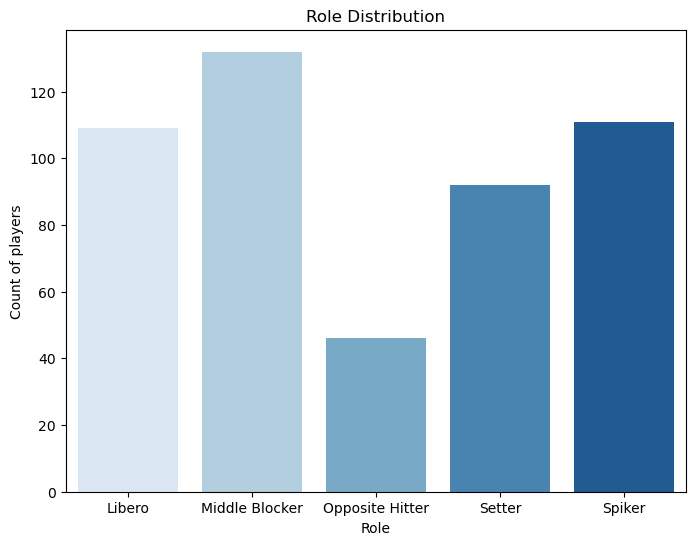

Role
Libero             109
Middle Blocker     132
Opposite Hitter     46
Setter              92
Spiker             111
Name: count, dtype: int64


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a frequency table for the role
role_counts = total_ds['Role'].value_counts()

# Sort the indexes (roles) alphabetically
role_counts = role_counts.sort_index()

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=role_counts.index, y=role_counts.values,  palette="Blues")
plt.title('Role Distribution')
plt.xlabel('Role')
plt.ylabel('Count of players')
plt.show()

print(role_counts)

4: Which role has the most total points?

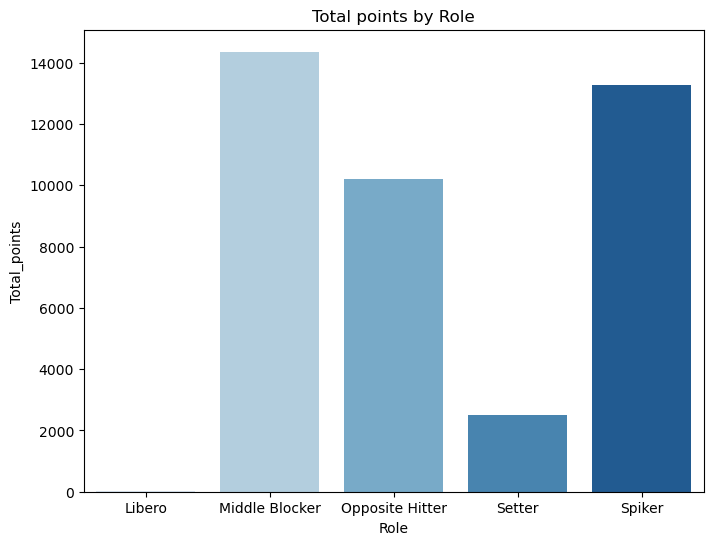

Role
Libero                20.0
Middle Blocker     14359.0
Opposite Hitter    10217.0
Setter              2488.0
Spiker             13278.0
Name: Pt_Tot, dtype: float64


In [62]:
# Sort roles by total points
total_points = total_ds.groupby('Role')['Pt_Tot'].sum()

# Sort the indexes (roles) alphabetically
total_points = total_points.sort_index()

plt.figure(figsize=(8, 6))

# Crea il grafico a barre con colori personalizzati
sns.barplot(x=total_points.index, y=total_points.values, palette="Blues")
plt.title('Total points by Role')
plt.xlabel('Role')
plt.ylabel('Total_points')
plt.show()

print(total_points)

5: Is there a correlation between height and the number of winning attacks?

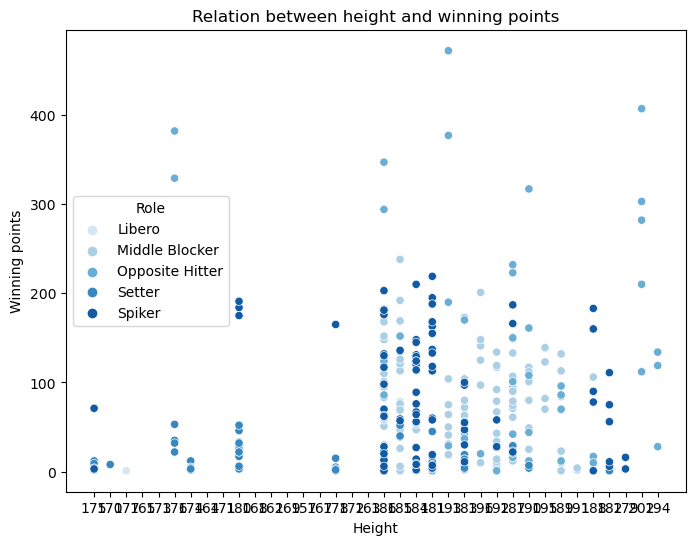

In [61]:
#Create a scatter plot to visualize the relationship

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Height', y='Winning_Pt', data=total_ds, hue='Role', palette='Blues')
plt.title('Relation between height and winning points')
plt.xlabel('Height')
plt.ylabel('Winning points')
plt.show()

6: Compare the efficiency in attack, reception and serving for each role

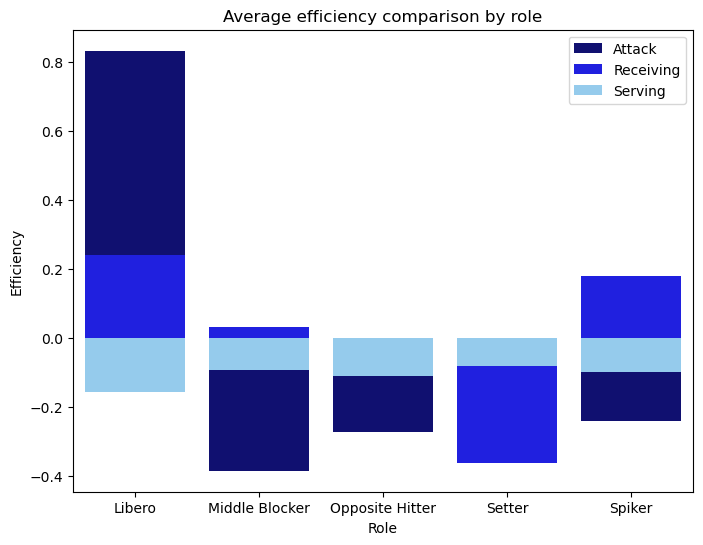

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns of interest
data_efficienza = total_ds[['Role', 'Att_Eff', 'Rice_Eff', 'Serve_eff']]

# Calculate the average of the efficiencies for each role
efficienza_per_ruolo = data_efficienza.groupby('Role').mean().sort_index()


# Create the clustered bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=efficienza_per_ruolo.reset_index(), x='Role', y='Att_Eff', color='navy', label='Attack')
sns.barplot(data=efficienza_per_ruolo.reset_index(), x='Role', y='Rice_Eff', color='blue', label='Receiving')
sns.barplot(data=efficienza_per_ruolo.reset_index(), x='Role', y='Serve_eff', color='lightskyblue', label='Serving')

plt.title('Average efficiency comparison by role')
plt.xlabel('Role')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

7: Defensive Performance: Compare the number of receptions, reception errors and perfect receptions for each position.
Which position has the best defensive performance?

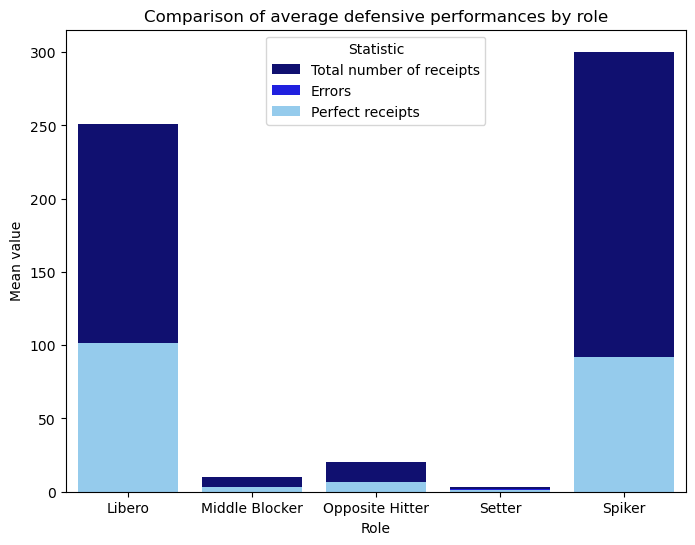

                   Rice_Tot   Rice_Err    Rice_Prf
Role                                              
Libero           251.160000  21.587629  101.760417
Middle Blocker    10.094340   2.094118    3.158537
Opposite Hitter   20.138889   4.952381    6.400000
Setter             3.540984   1.676471    1.200000
Spiker           300.336538  32.039604   92.069307


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns of interest
defense_data = total_ds[['Role', 'Rice_Tot', 'Rice_Err', 'Rice_Prf']]

# Calculate the averages for each role
defense_efficiency_by_role = defense_data.groupby('Role').mean().sort_index()

# Create the clustered bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=defense_efficiency_by_role.reset_index(), x='Role', y='Rice_Tot', color='navy', label='Total number of receipts')
sns.barplot(data=defense_efficiency_by_role.reset_index(), x='Role', y='Rice_Err', color='blue', label='Errors')
sns.barplot(data=defense_efficiency_by_role.reset_index(), x='Role', y='Rice_Prf', color='lightskyblue', label='Perfect receipts')

plt.title('Comparison of average defensive performances by role')
plt.xlabel('Role')
plt.ylabel('Mean value')
plt.legend(title='Statistic')

plt.show()
print(defense_efficiency_by_role)

8: Which variables are most correlated with each other?

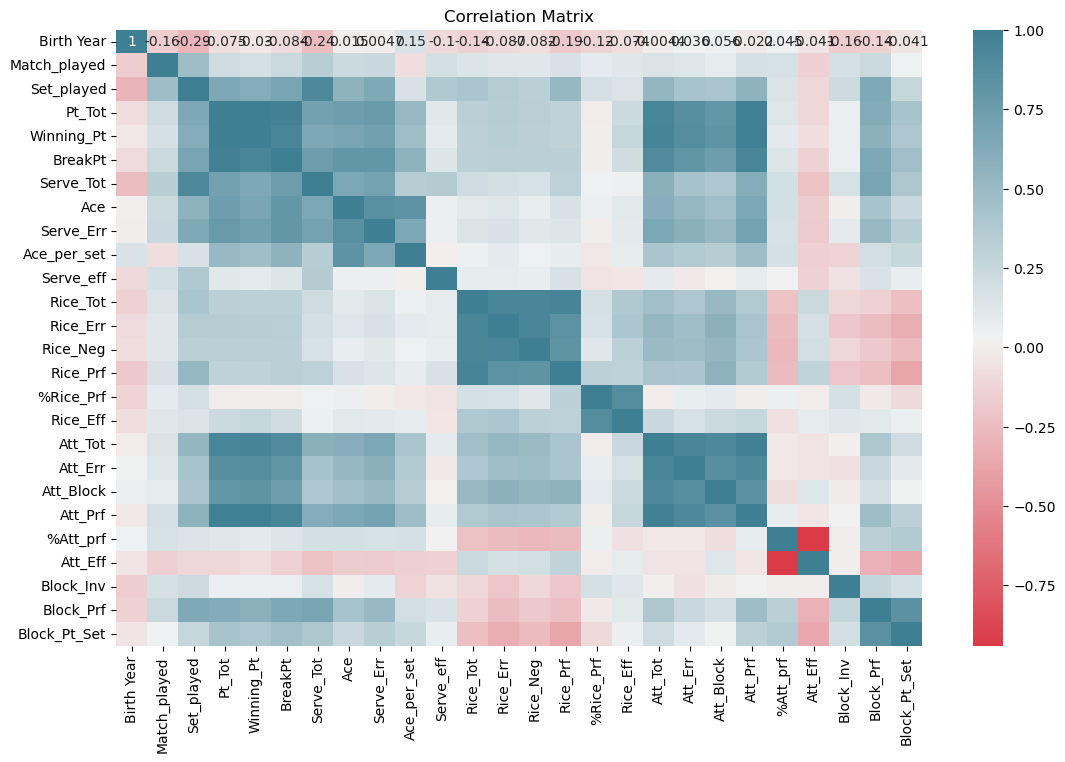

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = total_ds.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = total_ds[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(13, 8))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap)

plt.title('Correlation Matrix')
plt.show()
#print(corr_matrix)

# DATA QUALITY

We calculate the COMPLETENESS of the final datasets

In [27]:
import pandas as pd

def completeness_dataset(df):

  # Calculates the total number of cells in the dataset.
  total_cells = df.size

  # Calculates the total number of missing cells in the dataset.
  missing_cells = df.isnull().sum().sum()

  # Calculates the completeness of the dataset..
  completeness = (total_cells - missing_cells) / total_cells * 100

  return completeness

# Calculate the completeness.
completeness_total_ds = round(completeness_dataset(total_ds),2)
completeness_athletes = round(completeness_dataset(players),2)
team_turn = pd.read_csv("team_turn.csv")
completeness_team_turn = round(completeness_dataset(team_turn),2)


print("The completeness of the total_ds dataset is:", completeness_total_ds, "%")
print("The completeness of the athletes dataset is:", completeness_athletes, "%")
print("The completeness of the team_turn dataset is:", completeness_team_turn, "%")

The completeness of the total_ds dataset is: 75.21 %
The completeness of the athletes dataset is: 100.0 %
The completeness of the team_turn dataset is: 100.0 %
